In [1]:
import pandas as pd
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
# Importierung Datensatz vom lokalen PC
df = pd.read_csv("titanic.csv")

# Feature-Auswahl s. Erklärung Jupyter-Notebook "Datenbereinigung und Feature-Auswahl.ipynb"
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis=1)

# Mean-Replacaement für Missing Values in Age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Mutation der Sex-Daten von string zu boolean
df = pd.get_dummies(df, columns=['Sex'], drop_first=True, dtype='int')

# Definition feature und target, wobei für features das target-feature gedropped wird
features = df.drop(['Survived'], axis=1)
target = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12312, stratify=target)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_272\4151716118.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [3]:
# Reduziertes Modell mit zwei Hidden Layern und Dropout

inputs = Input(shape=(6, ))
hidden1 = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(inputs)
dropout1 = Dropout(0.2)(hidden1)
hidden2 = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dropout1)
dropout2 = Dropout(0.2)(hidden2)
output = Dense(1, activation='sigmoid')(dropout2)

model = Model(inputs=inputs, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Definition eines Stopp-Faktors für's Training, wenn über einen Zeitraum von 500 epochs kein Fortschritt erzielt wurde

early_stopping = EarlyStopping(
    monitor='val_accuracy',           # Definition Stop-Metrik
    patience=500,                  # Dauer der Stagnation bis Stopp
    restore_best_weights=True,  # Speichere das beste Trainingsergebnis
    mode = 'max'     
)
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping]) # Model-Training 

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4327 - loss: 1.4744 - val_accuracy: 0.6643 - val_loss: 0.8661
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6388 - loss: 1.0057 - val_accuracy: 0.6783 - val_loss: 0.6901
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6474 - loss: 0.7909 - val_accuracy: 0.6923 - val_loss: 0.6356
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6262 - loss: 0.8465 - val_accuracy: 0.6643 - val_loss: 0.6644
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6203 - loss: 0.7132 - val_accuracy: 0.6923 - val_loss: 0.6394
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6887 - loss: 0.7054 - val_accuracy: 0.6923 - val_loss: 0.6327
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6091 - loss: 0.7288 - val_accuracy: 0.6923 - val_loss: 0.6233
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6784 - loss: 0.6736 - val_accuracy: 0

In [5]:
results = model.evaluate(X_train, y_train)  # Result-Ausgabe für Trainingsdatensatz

print(f"Train Loss: {results[0]}")
print(f"Train Accuracy: {results[1]}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8326 - loss: 0.3916 
Train Loss: 0.3963390290737152
Train Accuracy: 0.8398876190185547


In [6]:
result = model.evaluate(X_test, y_test) # Result-Ausgabe für Testdatensatz zur Bewertung eines Overfits

print(f"Test Loss: {result[0]}")
print(f"Test accuracy: {result[1]}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7864 - loss: 0.5003 
Test Loss: 0.47913241386413574
Test accuracy: 0.8044692873954773


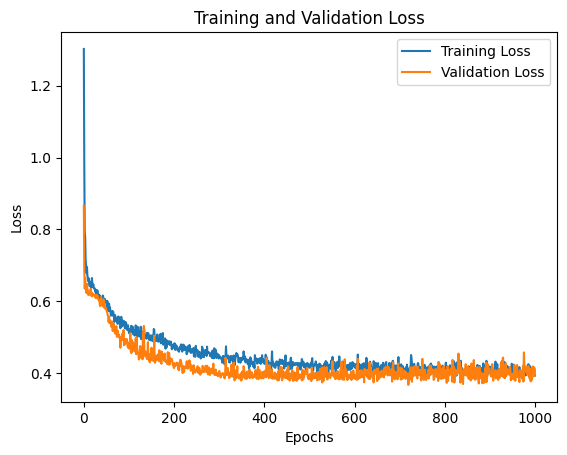

In [7]:
import matplotlib.pyplot as plt

# Plot für Lossverlauf von Trainings- und Testdaten über Epochs 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()